Il file 'Data.csv' contiene i dati relativi al consumo di energia elettrica della macchina del caffè di Alexide.\
La colonna **Date** rappresenta data e ora della registrazione del sensore. Si noti che le date sono espresse in UTC.
Per convertirle nella timezone locale utilizzare\
`df['Date'] = pd.to_datetime(df['Date'], utc = True).dt.tz_convert('Europe/Berlin')`\
La colonna **Energy** rappresenta il consumo di energia totale, espresso in W*min (Watt minuto), a partire dall'accensione del sensore.
Si noti che il sensore è stato riavviato diverse volte nel periodo di osservazione e, a seguito di ciascun riavvio, il conteggio è ripartito da 0.\
La colonna **Topic** rappresenta il topic del messaggio mqtt ricevuto dal sensore.

Rappresentare i consumi totali in kWh (kiloWatt ora) con una heatmap che abbia sull'asse x le ore del giorno e sull'asse y il giorno della settimana.

In [22]:
#importiamo le librerie che andremo a usare
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 

In [23]:
# carichiamo il file .csv pero possiamo notare che nel file le colonne Energy, Date, Topic sono attaccate tra di loro quindi usiamo il parametro sep per eseguire una separazione ogni volta che il compliatore incontra un ;
df = pd.read_csv('data.csv', sep=';')
df

,Energy,Date,Topic
0,31678,2022-10-04 07:44:00+00:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
1,31680,2022-10-04 07:45:02+00:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
2,31688,2022-10-04 07:46:04+00:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
3,31692,2022-10-04 07:47:21+00:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
4,31694,2022-10-04 07:48:15+00:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
...,...,...,...
54789,129200,2022-07-31 22:29:21+00:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
54790,129200,2022-07-31 22:24:20+00:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
54791,129200,2022-07-31 22:19:21+00:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
54792,129200,2022-07-31 22:14:21+00:00,shellies/shellyplug-s-D9B9EB/relay/0/energy


In [24]:
# Convertiamola la colonna Date nella timezone locale 
df['Date'] = pd.to_datetime(df['Date'], utc = True).dt.tz_convert('Europe/Berlin')
df['Date']

0       2022-10-04 09:44:00+02:00
1       2022-10-04 09:45:02+02:00
2       2022-10-04 09:46:04+02:00
3       2022-10-04 09:47:21+02:00
4       2022-10-04 09:48:15+02:00
                   ...           
54789   2022-08-01 00:29:21+02:00
54790   2022-08-01 00:24:20+02:00
54791   2022-08-01 00:19:21+02:00
54792   2022-08-01 00:14:21+02:00
54793   2022-08-01 00:09:07+02:00
Name: Date, Length: 54794, dtype: datetime64[ns, Europe/Berlin]

In [25]:
# ordino il data frame in base alla colonna Date  
df = df.sort_values(by=['Date'])
df

,Energy,Date,Topic
54793,129200,2022-08-01 00:09:07+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
54792,129200,2022-08-01 00:14:21+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
54791,129200,2022-08-01 00:19:21+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
54790,129200,2022-08-01 00:24:20+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
54789,129200,2022-08-01 00:29:21+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
...,...,...,...
50728,70544,2022-10-06 18:39:00+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
50729,70546,2022-10-06 18:40:01+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
50730,70548,2022-10-06 18:41:24+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
50731,70559,2022-10-06 18:42:01+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy


In [26]:
# vedendo le informazioni della colonna Date possiamo vedere che la conversione per datetime64 è andata a buon fine
df['Date'].info()

<class 'pandas.core.series.Series'>
Int64Index: 54794 entries, 54793 to 50732
Series name: Date
Non-Null Count  Dtype                        
--------------  -----                        
54794 non-null  datetime64[ns, Europe/Berlin]
dtypes: datetime64[ns, Europe/Berlin](1)
memory usage: 856.2 KB


In [27]:
# Faccio la conversione della colonna Energy da Watt minuto (W*m) a kilo Watt all'ora (Kw/h)
df['Energy'] = df['Energy'] / (1000 * 60)

In [28]:
# Setto la colonna Date come indice
df.set_index(df['Date'])

,Energy,Date,Topic
Date,,,
2022-08-01 00:09:07+02:00,2.153333,2022-08-01 00:09:07+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
2022-08-01 00:14:21+02:00,2.153333,2022-08-01 00:14:21+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
2022-08-01 00:19:21+02:00,2.153333,2022-08-01 00:19:21+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
2022-08-01 00:24:20+02:00,2.153333,2022-08-01 00:24:20+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
2022-08-01 00:29:21+02:00,2.153333,2022-08-01 00:29:21+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
...,...,...,...
2022-10-06 18:39:00+02:00,1.175733,2022-10-06 18:39:00+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
2022-10-06 18:40:01+02:00,1.175767,2022-10-06 18:40:01+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
2022-10-06 18:41:24+02:00,1.175800,2022-10-06 18:41:24+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy


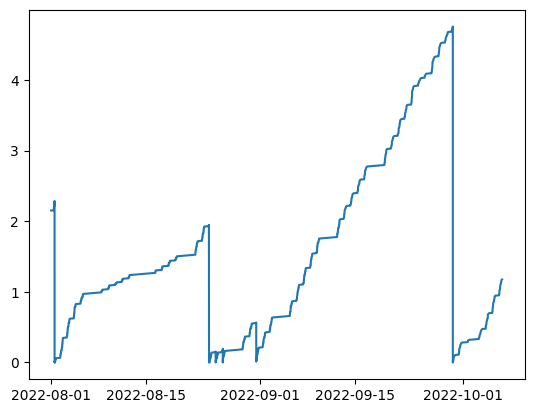

In [29]:
y = np.array(df['Energy'])
x = np.array(df['Date'])

plt.plot(x, y)
plt.show()

In [30]:
# creo la colonna Consumo facendo la differenza tra i valori della tabella Energy  
df['Consumo'] = df['Energy'].diff()

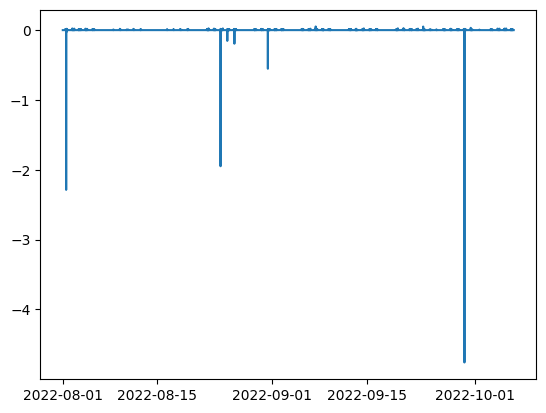

In [31]:
x = np.array(df['Date'])
y = np.array(df['Consumo'])

plt.plot(x, y)
plt.show()

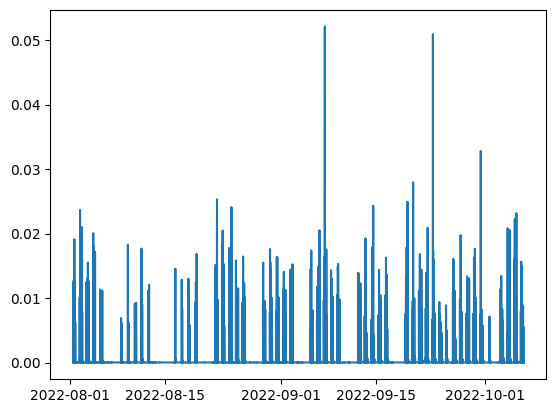

In [32]:
# filtro solo per i valori maggiori di zero (positivi)
df = df[df['Consumo'] > 0]
x = np.array(df['Date'])
y = np.array(df['Consumo'])

plt.plot(x, y)
plt.show()

In [33]:
# Ai valori della tabella 'Consumo' ho bisogno di eseguire la somma per ogni orario, unendo i dati per ogni orario
# Cosa fa la funzione resample: da sample (campione) esegue un 'ricampionamento' è un metodo di convenienza per la 
# conversione di frequenza e il ricampionamento di serie temporali. 
# L'oggetto deve avere un indice di tipo datetime o come in questo caso datetime64
df = df.resample('1H', on='Date').agg({'Consumo': 'sum'}).reset_index()
df
# reset.index(): Reimposta l'indice del DataFrame e utilizza invece quello predefinito.
# Se il DataFrame ha un MultiIndex, questo metodo può rimuovere uno o più livelli

,Date,Consumo
0,2022-08-01 09:00:00+02:00,0.044817
1,2022-08-01 10:00:00+02:00,0.011867
2,2022-08-01 11:00:00+02:00,0.076950
3,2022-08-01 12:00:00+02:00,0.018783
4,2022-08-01 13:00:00+02:00,0.014233
...,...,...
1589,2022-10-06 14:00:00+02:00,0.024800
1590,2022-10-06 15:00:00+02:00,0.021067
1591,2022-10-06 16:00:00+02:00,0.014117
1592,2022-10-06 17:00:00+02:00,0.004967


In [34]:
# Uso la libreria dateTime per ricavare i giorni della settimana e le ore 
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Hour'] = df['Date'].dt.hour
df

,Date,Consumo,DayOfWeek,Hour
0,2022-08-01 09:00:00+02:00,0.044817,0,9
1,2022-08-01 10:00:00+02:00,0.011867,0,10
2,2022-08-01 11:00:00+02:00,0.076950,0,11
3,2022-08-01 12:00:00+02:00,0.018783,0,12
4,2022-08-01 13:00:00+02:00,0.014233,0,13
...,...,...,...,...
1589,2022-10-06 14:00:00+02:00,0.024800,3,14
1590,2022-10-06 15:00:00+02:00,0.021067,3,15
1591,2022-10-06 16:00:00+02:00,0.014117,3,16
1592,2022-10-06 17:00:00+02:00,0.004967,3,17


Creazione della heatmap usando una pivot table

In [35]:
# creiamo la pivot table usando i valori della tabella Consumo, come indice la tabella DayOfWeek e come colonna la tabella ore, e ne calcoliamo la media
table = pd.pivot_table(df, values='Consumo', index=['DayOfWeek'], columns=['Hour'], aggfunc=np.mean)

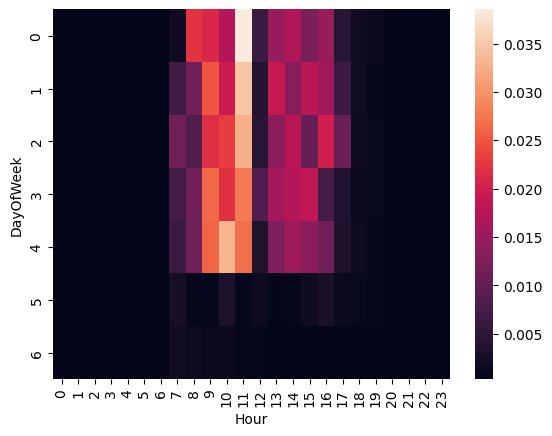

In [36]:
ax = sns.heatmap(table)

Creazione della heatmap usando groupby

In [37]:
# effettuo il raggruppamento e in questo modo i consumi verranno visualizzati in base all'ora e al giorno della settimana
df = df.groupby(['DayOfWeek', 'Hour']).mean()

C:\Users\maraw\AppData\Local\Temp\ipykernel_27072\4234154660.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(['DayOfWeek', 'Hour']).mean()


In [38]:
# la funzione unstack riporta il df con una nuova colonna e in questo modo abbiamo i consumi per ogni ora di ogni giorno
df = df.unstack()
df.columns = df.columns.droplevel(0)
df

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DayOfWeek,,,,,,,,,,,,,,,,,,,,,
0,0.000346,0.000341,0.000335,0.000341,0.000337,0.000346,0.000341,0.001961,0.022220,0.020982,...,0.016825,0.012338,0.014735,0.004240,0.001975,0.001268,0.000582,0.000347,0.000343,0.000353
1,0.000345,0.000355,0.000345,0.000352,0.000347,0.000343,0.000353,0.006875,0.011440,0.024937,...,0.013362,0.017862,0.015378,0.006423,0.002002,0.000927,0.000462,0.000347,0.000347,0.000357
2,0.000353,0.000348,0.000345,0.000347,0.000340,0.000350,0.000353,0.010958,0.008107,0.021953,...,0.017893,0.010435,0.019962,0.010677,0.001778,0.001103,0.000547,0.000355,0.000350,0.000350
3,0.000353,0.000352,0.000348,0.000348,0.000347,0.000347,0.000357,0.007193,0.011482,0.026478,...,0.017393,0.018418,0.007108,0.003575,0.001458,0.001157,0.000394,0.000359,0.000357,0.000354
4,0.000354,0.000350,0.000346,0.000346,0.000346,0.000354,0.000350,0.006276,0.011109,0.026020,...,0.015454,0.013811,0.011507,0.003204,0.001535,0.000787,0.000341,0.000357,0.000352,0.000350
5,0.000354,0.000350,0.000350,0.000352,0.000343,0.000346,0.000350,0.002698,0.000880,0.000891,...,0.000878,0.001794,0.002946,0.001230,0.001109,0.000822,0.000350,0.000341,0.000344,0.000343
6,0.000350,0.000352,0.000343,0.000346,0.000344,0.000352,0.000350,0.002096,0.001591,0.001406,...,0.000343,0.000335,0.000339,0.000337,0.000328,0.000330,0.000337,0.000337,0.000343,0.000346


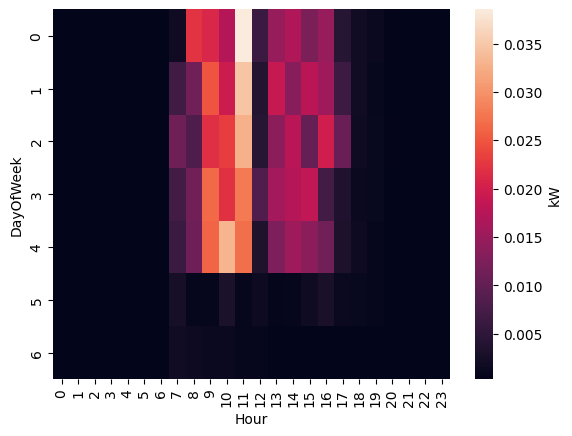

In [39]:
s = sns.heatmap(df, cbar_kws={'label': 'kW'})

Si può notare che giustamente la macchina non viene utilizzata nel week-end(giorni dove l'azienda è chiusa), e nei giorni lavorativi viene usata dalle 7 alle 19 circa (orari di lavoro). <br>
L'orario dove la macchina viene consumata di più è dalle 11 alle 12 (orario di pranzo) 